# <div style="text-align: center"> Taller 4 </div>  
<div style="text-align: center"> Alejandro Alayón Suárez - 201316083</div>
___

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import soundfile as sf
import os

### 1. Conceptos básicos de la Transformada Rápida de Fourier

A continuación se puede apreciar la rutina de la transformada rápida de Fourier para un dominio de $L=20$ y con $n$ puntos para una función Gaussiana dada por:

$f(x)=e^{-x^2}$


In [2]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]

u=np.exp(-(x**2))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

Dentro de los algoritmos de Fourier implementados en Numpy se destacan los siguientes:

* **FFT**: Realiza la transformada rápida de Fourier dado un arreglo de números.  


* **IFFT**: Realiza una transformada inversa devolviendo la función original dado un arreglo de numeros transformados por Fourier. 


* **FFTSHIFT**: Cambia la función transformada a sus posiciones matemáticamente correctas.  


* **IFFTSHIFT**: Es la función inversa de FFTSHIFT, es decir devuelve la función a sus posiciones originales.

En la siguiente celda de código se generan las gráficas para la función original, su transformada original, su transformada con pulsos invertidos y el valor absoluto de esta última.

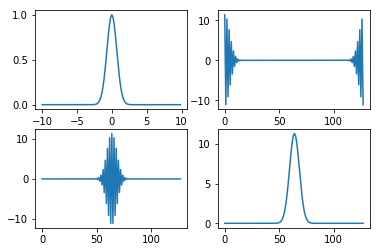

In [3]:
plt.subplot(221)
plt.plot(x,u)
plt.subplot(222)
plt.plot(np.real(ut))
plt.subplot(223)
plt.plot(np.real(utshift))
plt.subplot(224)
plt.plot(np.abs(utshift))
plt.show()

### 2. Derivación por FFT, DDFF y exacta.

Con el objetivo de ilustrar cómo se puede utilizar la trasnformada rápida de Fourier para derivar, se utilizó la siguiente función:

$u(x)=sech(x)$

Por lo tanto, sus derivadas con respecto a x serían:

$u'(x)=-sech(x)tanh(x)$

$u''(x)=sech(x)-2sech^3(x)$

En la siguiente celda de código se puede apreciar la primera y segunda derivada de la función mediante sus expresiones exactas, metodos de diferencias finitas de segundo y caurto orden y TFF.

In [4]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx=x[1]-x[0]
u=1/np.cosh(x)
ut=np.fft.fft(u)
k1=(2*np.pi/(L))*np.linspace(0,(n/2-1),64)
k2=(2*np.pi/(L))*np.linspace((-n/2),-1,64)
k=np.append(k1,k2)

#Derivadas por FFT
ut1=1j*ut*k
ut2=-k*k*ut
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=(-1/np.cosh(x))*np.tanh(x)
u2exact=(1/np.cosh(x))-2*((1/np.cosh(x))**3)

#Derivadas por DDFF de 2do orden
ux=[]
ux=np.append(ux,(-3*u[0]+4*u[1]-u[2])/(2*dx))
for i in range(1,n-1):
    ux=np.append(ux,(u[i+1]-u[i-1])/(2*dx))
ux=np.append(ux,(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))    

#Derivadas por DDFF de 4to orden
ux2=[]
ux2=np.append(ux2,(-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2=np.append(ux2,(-3*u[1]+4*u[2]-u[3])/(2*dx))
for i in range(2,n-2):
    ux2=np.append(ux2,(-u[i+2]+8*u[i+1]-8*u[i-1]+u[i-2])/(12*dx))
ux2=np.append(ux2,(3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))
ux2=np.append(ux2,(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))

A continuación se muestran los resultados de las derivaciones. Es evidenciable que los dos metodos concuerdan con la derivación exacta. Vale aclarar que las derivadas obtenidas mediante FFT únicamente son confiables si la función es derivada entre limites periódicos.

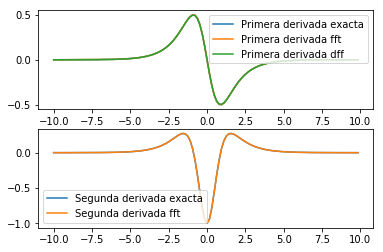

In [5]:
plt.subplot(211)
plt.plot(x,u1exact,label='Primera derivada exacta')
plt.plot(x,u1,label='Primera derivada fft')
plt.plot(x,ux,label='Primera derivada dff')
plt.legend()
plt.subplot(212)
plt.plot(x,u2exact,label='Segunda derivada exacta')
plt.plot(x,u2,label='Segunda derivada fft')
plt.legend(loc='lower left')
plt.show()

### 3. Aplicaciondes de la FFT: Detección de radar y filtrado

La transformada rápida de Fourier ha mostrado tener aplicaciones amplias para el procesamiento de señales. Acontinuación se da un ejemplo de una señal con ruido implementado y cómo se puede aplicar un filtro para disminuir dicho ruido.

In [6]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
k1=(2*np.pi/(2*L))*np.linspace(0,(n/2-1),256)
k2=(2*np.pi/(2*L))*np.linspace((-n/2),-1,256)
k=np.append(k1,k2)
u=(1/np.cosh(t))
noise=10
ut=np.fft.fft(u)
unt=ut+noise*(np.random.rand(n)+1j*np.random.rand(n))
un=np.fft.ifft(unt)
un[0]=0.2
filt=np.exp(-0.1*(k**2))
unft=filt*unt
unf=np.fft.ifft(unft)

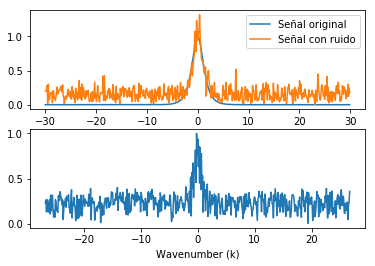

In [7]:
plt.subplot(211)
plt.plot(t,u,label='Señal original')
plt.plot(t,np.abs(un),label='Señal con ruido')
plt.legend(loc='upper right')
plt.subplot(212)
plt.xlabel('Wavenumber (k)')
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unt))/max(np.abs(np.fft.fftshift(unt))))
plt.show()

Para la disminución del ruido es posible aplicar un filtro Gaussiano simple como el mostrado a continuación:

$F(k)=e^{-\tau(k-k_0)^2}$

Dicho filtro es aplicado sobre la función transformada la cual es posteiormente invertida para retomar la función original sin ruido. A continuación se muestra las figuras del antes y después de la señal filtrada además de la señal filtrada en el dominio de la frecuencia:

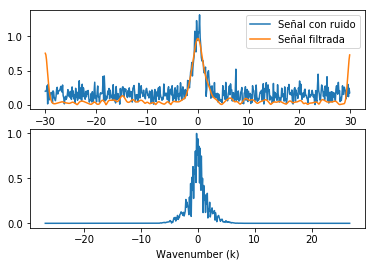

In [8]:
plt.subplot(211)
plt.plot(t,np.abs(un),label='Señal con ruido')
plt.plot(t,np.abs(unf),label='Señal filtrada')
plt.legend(loc='upper right')
plt.subplot(212)
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft))/max(np.abs(np.fft.fftshift(unft))))
plt.xlabel('Wavenumber (k)')
plt.show()

### 4. Aplicaciondes de la FFT: Detección de radar y promediamiento

In [ ]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
k1=(2*np.pi/(2*L))*np.linspace(0,(n/2-1),256)
k2=(2*np.pi/(2*L))*np.linspace((-n/2),-1,256)
k=np.append(k1,k2)
ks=np.fft.fftshift(k)
noise=10

r=100
u=(1/np.cosh(t))
ave4=np.zeros((1,n))
ut=np.fft.fft(u)

unt=ut+noise*(np.random.rand(n)+1j*np.random.rand(n))
ave4=ave4+unt
dat=np.abs(np.fft.fftshift(unt))/max(np.abs(unt))
un=np.fft.ifft(unt)
ave4=np.abs(np.fft.fftshift(ave4))/r

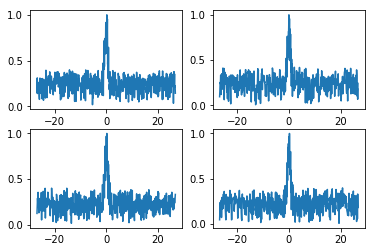

In [82]:
plt.subplot(221)
plt.plot(ks,ave1[0]/np.max(ave1))
plt.subplot(222)
plt.plot(ks,ave2[0]/np.max(ave2))
plt.subplot(223)
plt.plot(ks,ave3[0]/np.max(ave3))
plt.subplot(224)
plt.plot(ks,ave4[0]/np.max(ave4))
plt.show()

### 5. Ejemplo práctico 1

Con el objetivo de demostrar las funciones prácticas de la FFT se propuso disminuir el ruido del viento de una grabación de menos de un minuto de duración utilizando un análisis frecuencial. Para esto, se importó una fracción de un audio y se graficó su archivo .WAV tal como se muestra a continuación:

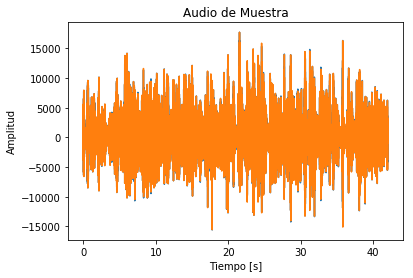

In [26]:
from scipy.io.wavfile import read
import IPython.display as ipd

#Importación del archivo de audio desde la carpeta de origen (t=frecuencia de muestreo [Hz], data=valores de WAV)
t, data = read("Muestra.wav")
#Recorte del archivo para la extracción de la parte a tratar
audio = data[16608000:18624000]
#Generación de la linea de tiempo
dt=(18624000-16608000)
x=np.linspace(0,dt/t,dt)
#Graficación
plt.plot(x,audio)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo [s]")
plt.title("Audio de Muestra")
plt.show()

Una vez el audio ha sido importado y el tramo a tratar cortado, se puede proceder a hacer el análisis frecuencial con el objetivo de encontrar la frecuencia con mayor presencia (la cual se supone es la del viento) y eliminarla. En teoría, el ruido del viento se encuentra en un rango de entre 80 y 1500 Hz, dicho rango es problemático ya que en este también se encuentran algunas frecuencias de la voz humana. A continuación se puede apreciar las gráficas y el tramo de frecuencias eliminado:

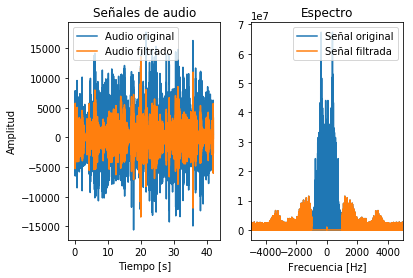

In [53]:
#Se calcúla el vector frecuencial de la señal mediante su cantidad de datos y frecuencia de muestreo
n = len(audio)
timestep = 1/t
W = np.fft.fftfreq(n, d=timestep)
#Cada canal es separado y su FFT calculada
f_signal0 = np.fft.fft(audio[:,0])
f_signal1 = np.fft.fft(audio[:,1])
#Se reflejan las FFT y el W para poder hacer el análisis frecuencial
f_signal_shift0=np.fft.fftshift(f_signal0)
f_signal_shift1=np.fft.fftshift(f_signal1)
W_shift=np.fft.fftshift(W)
#Se genera una copia de la distribución de frecuencias de cada canal y se eliminan las frecuencias entre 0 y 1000 Hz
cut_f_signal0 = f_signal_shift0.copy()
cut_f_signal0[(W_shift > -1000)& (W_shift < 0)]=0
cut_f_signal0[(W_shift > 0)& (W_shift < 1000)]=0
cut_f_signal1 = f_signal_shift1.copy()
cut_f_signal1[(W_shift > -1000)& (W_shift < 0)]=0
cut_f_signal1[(W_shift > 0)& (W_shift < 1000)]=0
#Se aplica la función inversa de FFTshift y de FFT para obtener nuevamente una señal de audio
cut_ishift0= np.fft.ifftshift(cut_f_signal0)
cut_signal0=  np.fft.ifft(cut_ishift0)
cut_ishift1= np.fft.ifftshift(cut_f_signal1)
cut_signal1=  np.fft.ifft(cut_ishift1)
#Graficación
plt.subplot(121)
plt.title('Señales de audio')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')
plt.plot(x,np.real(audio[:,0]),label='Audio original')
plt.plot(x,np.real(cut_signal1),label='Audio filtrado')
plt.legend()
plt.subplot(122)
plt.title('Espectro')
plt.xlabel('Frecuencia [Hz]')
axes = plt.gca()
axes.set_xlim([-5000,5000])
plt.plot(np.real(W_shift),np.abs(np.real(f_signal_shift0)),label='Señal original')
plt.plot(np.real(W_shift),np.abs(np.real(cut_f_signal0)),label='Señal filtrada')
plt.legend()
plt.show()

Si se observan las gráficas de la parte superior se puede apreciar que se eliminaron aquellas frecuencias comprendidas entre 0 y 1000 Hz lo cual afecto a la señal de audio eliminando gran parte del ruido y disminuyendo su amplitud general. A continuación se muestra la exportación de la señal y una pequeña muestra del audio.

In [64]:
#Se toman las partes reales de cada uno de los canales y se combinan las columnas
a=np.real(cut_signal0)
b=np.real(cut_signal1)
c=np.column_stack((a,b))
#Se establece el tipo de datos y se crea un arreglo
new_array = np.array(c, dtype = np.int16)
#Se exporta el audio filtrado
sp.io.wavfile.write('Muestra_Filtrada.wav', 48000, new_array)
#Creación de los samples
audio1 = data[16608000:16898000]
audio2=  new_array[0:288000]
sp.io.wavfile.write('Sample_Muestra.wav', 48000, audio1)
sp.io.wavfile.write('Sample_Muestra_Filtrada.wav', 48000, audio2)

In [65]:
ipd.Audio('Sample_Muestra.wav')

In [66]:
ipd.Audio('Sample_Muestra_Filtrada.wav')

Al apreciar los samples de las grabaciones antes y después del filtrado se logra evidenciar una disminución considerable del ruido, sin embargo el filtro aplicado deteriora claramente la calidad del audio y disminuye su volumen. Esto de debe a que el ruido del viento no es periódico por lo cual se debe escoger un rango de frecuencias para filtrar en el cual se encuentra algunos tonos de la voz humana (esta es captada por las grabadoras entre los 85 y los 3000 Hz). Una posible solución sería aplicar un filtro dinámico el cual recorriera la grabación en un delta t dado y filtrara por partes dicha señal.

### 6. Ejemplo práctico 2

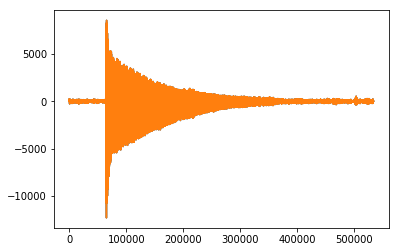

In [69]:
x, sr = read("Do.wav")
plt.plot(sr)
plt.show()

In [75]:
import IPython.display as ipd
ipd.Audio('Do.wav') # load a local WAV file

C:\Users\Alejandro\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


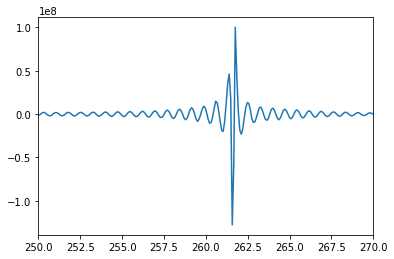

In [76]:
n = len(sr)
timestep = 1/x
W = np.fft.fftfreq(n, d=timestep)
do_fft = np.fft.fft(sr[:,1])
do_fftshift=np.fft.fftshift(do_fft)
W_fftshift=np.fft.fftshift(W)

plt.plot(W_fftshift,do_fftshift)
axes = plt.gca()
axes.set_xlim([250,270])
plt.show()

In [100]:
a=np.where(do_fftshift==max(do_fftshift))
W_fftshift[a]

array([ 261.75764847])

In [97]:
df['Frecuencia (Hz)'][87]

27.5

In [99]:
import pandas as pd
 
tol=0.5
a=[]
l=len(df)-1

for i in range(0,l):
    
    a = np.append(a,df['Frecuencia (Hz)'][i])

df = pd.read_excel('Datos_nota.xlsx', sheetname='Sheet4')
 
df['Frecuencia (Hz)']



0     4186.0100
1     3951.0700
2     3729.3100
3     3520.0000
4     3322.4400
5     3135.9600
6     2959.9600
7     2793.8300
8     2637.0200
9     2489.0200
10    2349.3200
11    2217.4600
12    2093.0000
13    1975.5300
14    1864.6600
15    1760.0000
16    1661.2200
17    1567.9800
18    1479.9800
19    1396.9100
20    1318.5100
21    1244.5100
22    1174.6600
23    1108.7300
24    1046.5000
25     987.7670
26     932.3280
27     880.0000
28     830.6090
29     783.9910
        ...    
58     146.8320
59     138.5910
60     130.8130
61     123.4710
62     116.5410
63     110.0000
64     103.8260
65      97.9989
66      92.4986
67      87.3071
68      82.4069
69      77.7817
70      73.4162
71      69.2957
72      65.4064
73      61.7354
74      58.2705
75      55.0000
76      51.9130
77      48.9995
78      46.2493
79      43.6536
80      41.2035
81      38.8909
82      36.7081
83      34.6479
84      32.7032
85      30.8677
86      29.1353
87      27.5000
Name: Frecuencia (Hz), L